In [16]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [4]:
df = pd.read_csv('job_data.csv', encoding='utf-8')

In [7]:
job_data.info()
job_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    75 non-null     object
 1   Vacancy Title   75 non-null     object
 2   Position Title  75 non-null     object
 3   Level           69 non-null     object
 4   Skills          75 non-null     object
dtypes: object(5)
memory usage: 3.1+ KB


,Company Name,Vacancy Title,Position Title,Level,Skills
0,VK,"Инженер-разработчик Data Science (проект ""Лент...",Ученый по данным,Средний (Middle),"['Python', 'Java', 'Apache Spark', 'Apache Had..."
1,Сбер,Data engineer,Инженер по данным,Средний (Middle),"['SQL', 'Python']"
2,Лаборатория Касперского,Data Scientist,Разработчик игр,NaN,['Python']
3,ВСК,Data Scientist,Ученый по данным,Средний (Middle),['Python']
4,Сбер,Data scientist,Ученый по данным,Средний (Middle),"['Git', 'SQL', 'Python', 'Машинное обучение', ..."


In [5]:
df.describe()

,Company Name,Vacancy Title,Position Title,Level,Skills
count,75,75,75,69,75
unique,37,62,19,4,65
top,Банк ВТБ,Data engineer,Инженер по данным,Средний (Middle),['Python']
freq,10,6,19,34,6


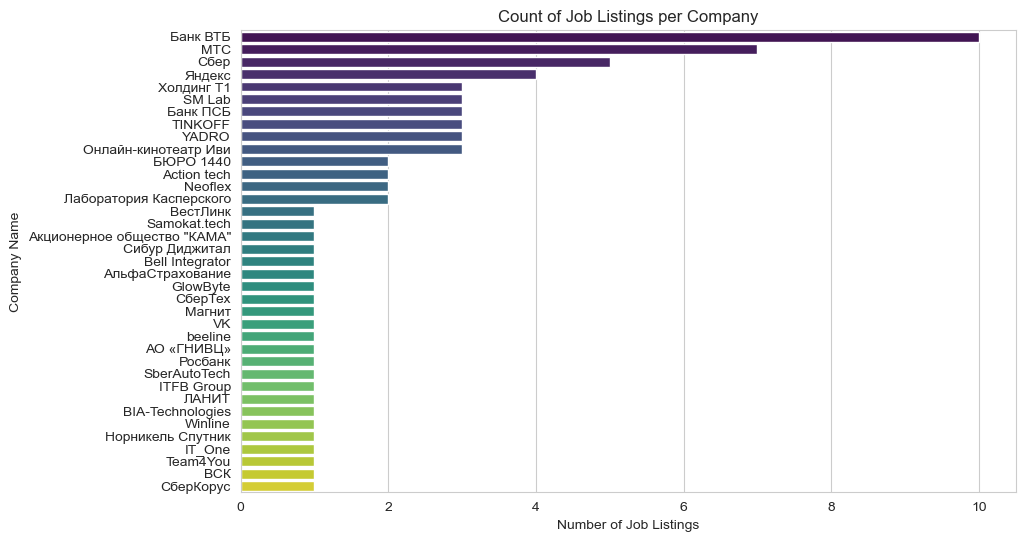

Банк ВТБ      10
МТС            7
Сбер           5
Яндекс         4
Холдинг Т1     3
Name: Company Name, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

job_count_per_company = job_data['Company Name'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(y=job_count_per_company.index, x=job_count_per_company.values, palette="viridis")
plt.xlabel('Number of Job Listings')
plt.ylabel('Company Name')
plt.title('Count of Job Listings per Company')
plt.show()

job_count_per_company.head()

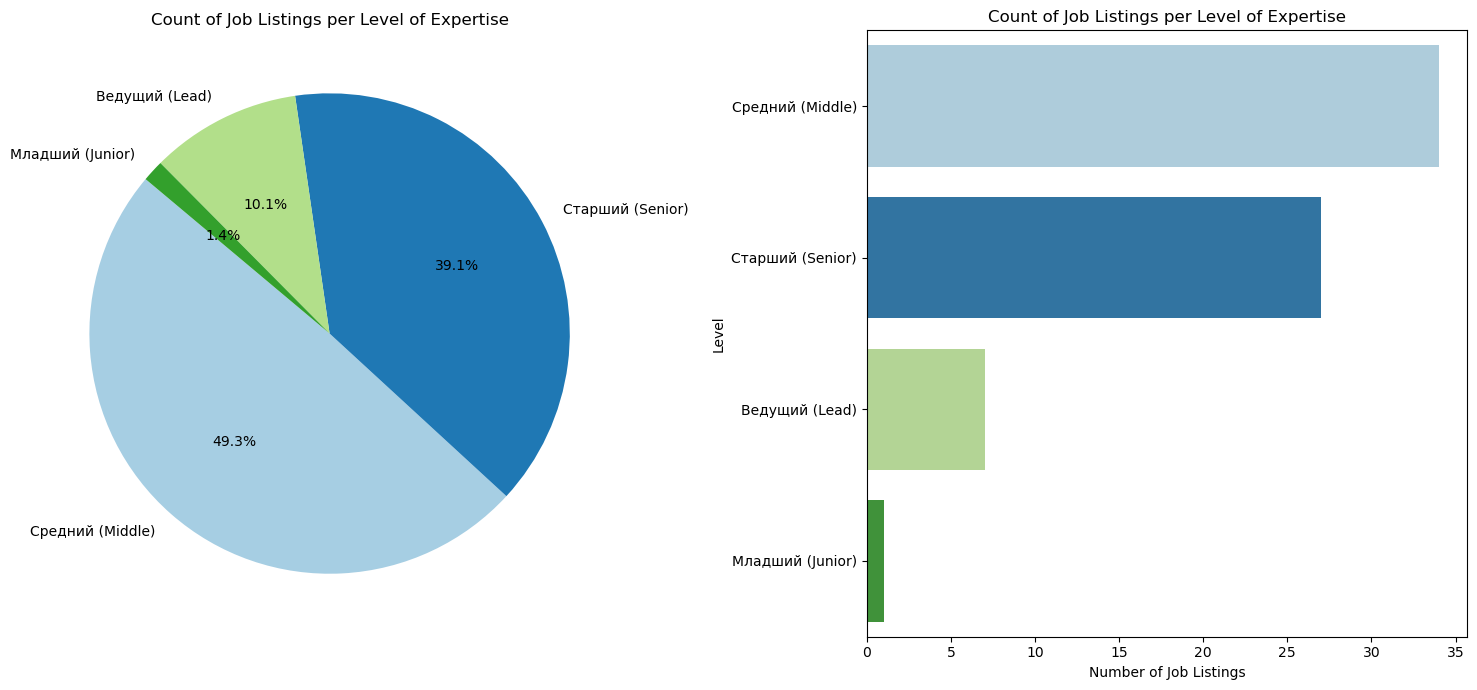

Level
Средний (Middle)    34
Старший (Senior)    27
Ведущий (Lead)       7
Младший (Junior)     1
Name: count, dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


job_count_per_level = job_data['Level'].value_counts()

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.pie(job_count_per_level.values, labels=job_count_per_level.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
plt.title('Count of Job Listings per Level of Expertise')

plt.subplot(1, 2, 2)
sns.barplot(y=job_count_per_level.index, x=job_count_per_level.values, palette="Paired")
plt.xlabel('Number of Job Listings')
plt.ylabel('Level')
plt.title('Count of Job Listings per Level of Expertise')

plt.tight_layout()
plt.show()

print(job_count_per_level)

### Most Demanded Skills

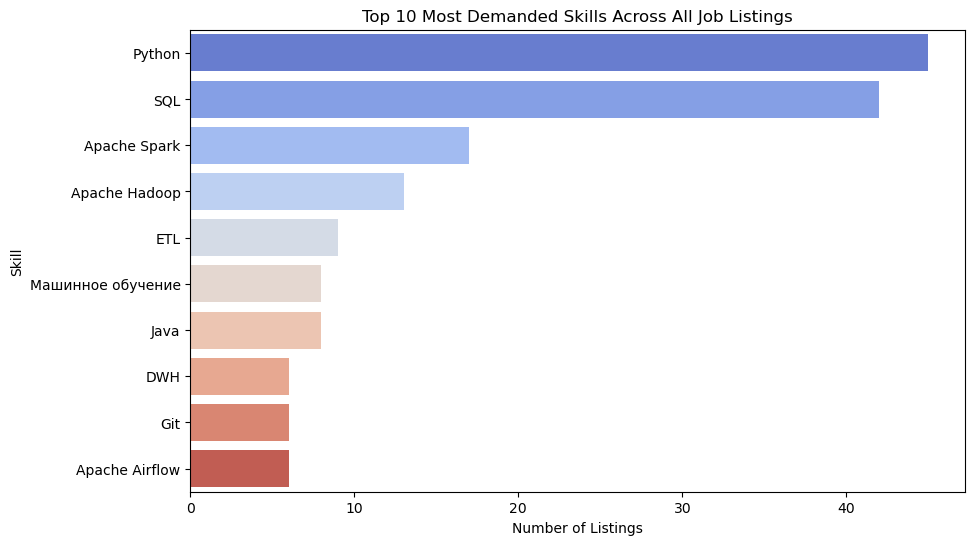

Python               45
SQL                  42
Apache Spark         17
Apache Hadoop        13
ETL                   9
Машинное обучение     8
Java                  8
DWH                   6
Git                   6
Apache Airflow        6
Name: count, dtype: int64

In [23]:
import ast

job_data['Skills_list'] = job_data['Skills'].apply(ast.literal_eval)

all_skills = [skill for sublist in job_data['Skills_list'] for skill in sublist]
skills_series = pd.Series(all_skills)

top_skills = skills_series.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_skills.index, x=top_skills.values, palette="coolwarm")
plt.xlabel('Number of Listings')
plt.ylabel('Skill')
plt.title('Top 10 Most Demanded Skills Across All Job Listings')
plt.show()


top_skills

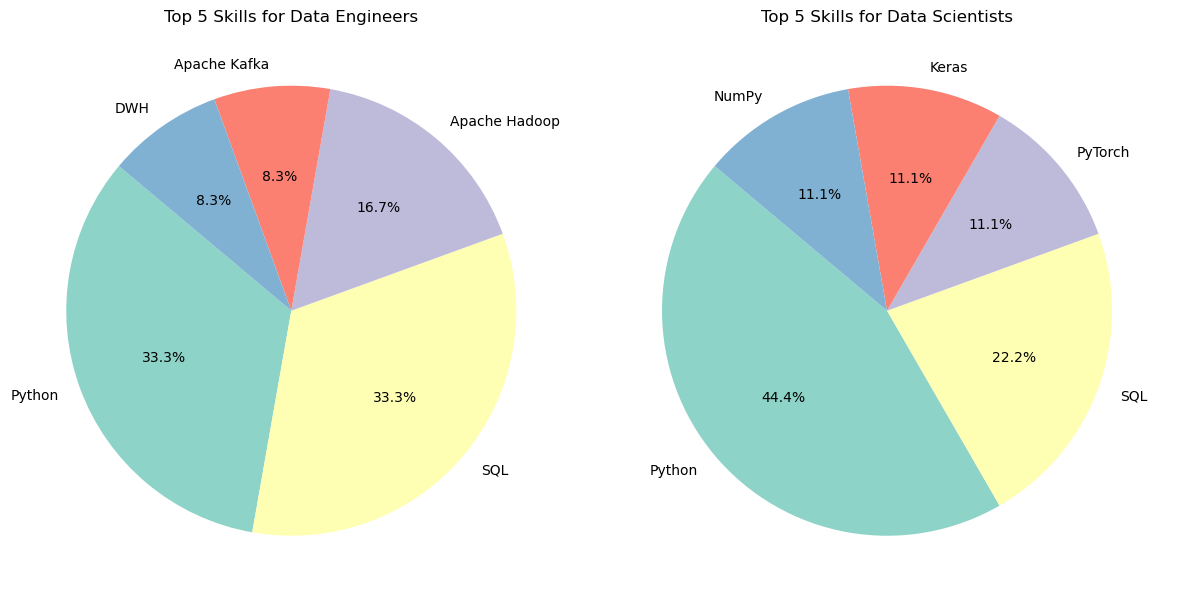

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

skills_data_engineer = job_data[job_data['Vacancy Title'] == 'Data Engineer']['Skills_list']
skills_data_scientist = job_data[job_data['Vacancy Title'] == 'Data Scientist']['Skills_list']

all_skills_data_engineer = [skill for sublist in skills_data_engineer for skill in sublist]
all_skills_data_scientist = [skill for sublist in skills_data_scientist for skill in sublist]

top_skills_data_engineer = pd.Series(all_skills_data_engineer).value_counts().head(5)
top_skills_data_scientist = pd.Series(all_skills_data_scientist).value_counts().head(5)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(top_skills_data_engineer.values, labels=top_skills_data_engineer.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Top 5 Skills for Data Engineers')

plt.subplot(1, 2, 2)
plt.pie(top_skills_data_scientist.values, labels=top_skills_data_scientist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Top 5 Skills for Data Scientists')

plt.tight_layout()
plt.show()